# **Checkpoint 01 - Modelagem de Dados e Aprendizagem de Máquina**

## **Objetivo**
Avaliar conceitos sobre Modelagem de dados e Aprendizado de Máquina (ML) adquiridos no curso.

## **Descrição do Desafio**
Você foi contratado por uma empresa que desenvolveu uma plataforma de compra e venda de carros usados. O funcionamento é bem simples, os usuários cadastram o carro que querem vender e esperam que outro usuário os compre, a empresa então fica com uma parte do valor de venda. Seu papel é desenvolver um modelo que possa determinar qual o melhor preço de venda para um usado.

Para nortear o desenvolvimento, você precisa de um ponto de partida e determinou uma pergunta chave: **Qual o preço de venda de um veículo Volkswagen Sedan 2.0 a gasolina, ano 2005, com cerca de 172095 km rodados?**

### **Orientações**
Para responder a essa pergunta, você deve utilizar o dataset da empresa, que está representado no arquivo **carros.csv**, e seguir o roteiro proposto neste desafio.

## **Exploração de Dados - 2 pontos**

1 - Carregue o dataset e faça a inspeção nas 15 primeiras linhas para identificação dos atributos. Quantos dados existem nesse dataset? Qual a quantidade de atributos? Existem valores faltantes? De que tipo são os dados? (1,0)

In [22]:
import pandas as pd

df = pd.read_csv('carros.csv')

df.head(15)

,Brand,Price,Body,Mileage/1000,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.00,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV


In [23]:
df.shape

(4345, 9)

In [24]:
print(df.isna().sum())

Brand             0
Price           172
Body              0
Mileage/1000      0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64


In [25]:
df.dtypes

Brand            object
Price           float64
Body             object
Mileage/1000      int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object

dados = 4345 x 9 = 39.105

quantidade de atributos = 9

sim, existem valores faltantes

verificamos os tipos dos dados no comando dtypes

2 - Note que os dataset está no sistema americano. Converta os dados para o sistema métrico e altere o cabeçalho de forma que os dados façam sentido. (1,0)

Obs: Os dados de Milhas dividos por mil, ou seja, multiplique o valor por 1.000 para ter o valor real!

In [26]:
#Sua resposta aqui

In [27]:
traducao = {
    
    'Brand' : 'Marca',
    'Price' : 'Preço',
    'Body' : 'Tipo do Carro',
    'Mileage/1000' : 'Milhas',
    'EngineV' : 'Motor',
    'Engine Type' : 'Tipo do Combustivel',
    'Registration' : 'Tem Registro?',
    'Year' : 'Ano',
    'Model' : 'Modelo'

}

df = df.rename(columns=traducao)

In [28]:
df.head()

,Marca,Preço,Tipo do Carro,Milhas,Motor,Tipo do Combustivel,Tem Registro?,Ano,Modelo
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [29]:
def converter_para_quilometros(milhas):
    quilometros = milhas * 1000
    return quilometros


df['Quilometragem'] = converter_para_quilometros(df['Milhas'])



In [30]:
df = df.drop('Milhas', axis=1)

df.head()

,Marca,Preço,Tipo do Carro,Motor,Tipo do Combustivel,Tem Registro?,Ano,Modelo,Quilometragem
0,BMW,4200.0,sedan,2.0,Petrol,yes,1991,320,277000
1,Mercedes-Benz,7900.0,van,2.9,Diesel,yes,1999,Sprinter 212,427000
2,Mercedes-Benz,13300.0,sedan,5.0,Gas,yes,2003,S 500,358000
3,Audi,23000.0,crossover,4.2,Petrol,yes,2007,Q7,240000
4,Toyota,18300.0,crossover,2.0,Petrol,yes,2011,Rav 4,120000


## **Analise descritiva dos dados - 2 pontos**

3 - Faça uma análise exploratória dos dados, utilizando gráficos e tabelas para realizar correlações entre os atributos e que permitam criar um cenário de correlação entre eles.

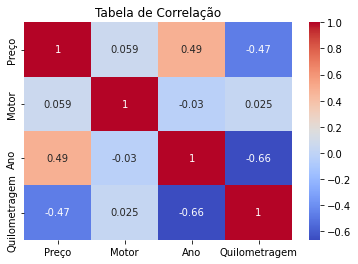

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


df = df.dropna()

# Cria uma tabela de correlação
corr_matrix = df.corr()

# Cria um mapa de calor da tabela de correlação
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Tabela de Correlação')
plt.show()

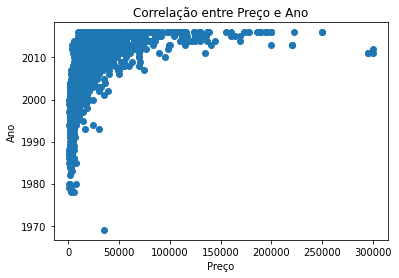

In [62]:
#Correlação entre preço e Quilometragem

plt.scatter(x=df['Preço'], y=df['Ano'])

plt.title('Correlação entre Preço e Ano')
plt.xlabel('Preço')
plt.ylabel('Ano')

plt.show()

## **Desenvolvimento do Modelo - 2 pontos**

4 - O conjunto de dados indica a aplicação de qual modelo de aprendizagem de máquina para responder a pergunta do desafio? Por quê? (1,0)

Acredito que o modelo mais indicado nesse caso é o modelo supervionado, acho que um exemplo bom para explicar o porquê, é que no caso, temos dados "rotulados" no caso da variável que queremos prever, que seria a principal pergunta do desafio. 'Qual o preço do carro com as seguintes características?'

5 - Qual a técnica sugerida para este projeto? Por quê? (1,0)


Resposta: Acredito que nesse caso puxe mais pro lado da regressão LINEAR. Pois estamos tentando prever um determinado valor ou talvez uma correlação, como no exemplo acima do mapa de calor, estamos tentando prever se, o preço, tem alguma coisa haver com o ano (por exemplo). Em casos reais até deveria ter algo "haver", mas não vem ao caso, enfim, acho que o principal fator de ter de puxar mais pro lado de um ou outro, é regressão, pois contamos a questão da PREVISÃO.

Com base nas suas respostas, agora escolha dois algortimos para implementar e comparar a performance de cada um deles ao final do desafio.

Resposta:

Algoritmo 1:

Algoritmo 2:

In [61]:
#Algoritmo 1: 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df[['Preço']]
y = df['Quilometragem']

# dividir o conjunto de dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# fazer previsões com o conjunto de teste
y_pred = model.predict(X_test)

# avaliar o modelo usando o coeficiente de determinação (R²)
r2 = r2_score(y_test, y_pred)
print("R2 Score: {:.2f}".format(r2))

R2 Score: 0.25


In [60]:
#Algoritmo 2:

X = df[['Marca', 'Preço', 'Tipo do Carro', 'Motor', 'Tipo do Combustivel', 'Tem Registro?', 'Ano', 'Modelo']]
y = df['Quilometragem']

# converter as variáveis categóricas em variáveis numéricas usando codificação one-hot
X = pd.get_dummies(X)

# dividir o conjunto de dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# fazer previsões com o conjunto de teste
y_pred = model.predict(X_test)

# avaliar o modelo usando o coeficiente de determinação (R²)
r2 = r2_score(y_test, y_pred)
print("R2 Score: {:.2f}".format(r2))

R2 Score: 0.55


## **Treinamento e teste do Modelo - 3 pontos**

6 - Crie um subset dos dados que serão utilizados para o treinamento e para o teste do modelo. Divida este subset em treino e teste. (1,0) 

In [43]:
from sklearn.model_selection import train_test_split

# Selecionando as colunas desejadas
X = df[['Motor', 'Ano', 'Quilometragem']]
y = df['Preço']

# Dividindo os dados em conjunto de treino e teste (80% para treino e 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [44]:
print("Preços de Treino (y_train):")
print(y_train.head())

Preços de Treino (y_train):
3464     1450.0
953     17800.0
1900    32500.0
2121    10200.0
2979    38500.0
Name: Preço, dtype: float64


In [45]:
len(X_train), len(X_test), len(y_train), len(y_test)

(3220, 805, 3220, 805)

In [46]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3220, 3)
(805, 3)
(3220,)
(805,)


7 - Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

7.1 - Algoritmo 1: (0,5)


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Criando os modelos de regressão
linear_reg = LinearRegression()

# Treinando os modelos com os dados de treino
linear_reg.fit(X_train, y_train)

# Realizando a predição com os dados de teste
linear_pred = linear_reg.predict(X_test)

# Avaliando o desempenho dos modelos
print("R2: {:.2f}".format(r2_score(y_test, linear_pred)))


R2: 0.28


7.2 - Algoritmo 2:  (0,5)

In [49]:
# Criando os modelos de regressão
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinando os modelos com os dados de treino
rf_reg.fit(X_train, y_train)

# Realizando a predição com os dados de teste
rf_pred = rf_reg.predict(X_test)

# Avaliando o desempenho dos modelos

print("R2: {:.2f}".format(r2_score(y_test, rf_pred)))


R2: 0.88


7.3 - Qual dos algortimos obteve melhor resultado? Por quê? (1,0)

Resposta: Bom, entre os dois o que teve o melhor resultado foi o 2°. oque foi ultilizado o random forest regression metrics. e bom, pelo que eu pesquisei, no caso pra verificar se um modelo é melhor, funciona assim: 

r2 score, quanto mais próximo de 1 melhor

rmse, quanto mais próximo de 0 melhor

mae, quanto mais próximo de 0 melhor

No caso, como verificamos o R2, o melhor seria o 2° algoritmo

## **Modelo de Produção: Teste com novos dados - 1 ponto**

8 - Use o seu modelo treinado para responder a pergunta do desafio:

In [53]:
from sklearn.linear_model import LinearRegression

# Treinando um modelo de regressão linear simples com os dados de treino
model = LinearRegression().fit(X_train, y_train)

# Criando um dataframe com as informações do carro que queremos prever o preço
new_car = {'Motor': 2.0, 'Ano': 2005, 'Quilometragem': 172095}
new_car_df = pd.DataFrame(data=new_car, index=[0])

# Prevendo o preço do carro usando o modelo treinado
price = model.predict(new_car_df)

print(f"O preço previsto para o carro é: R$ {price[0]:.2f}")

O preço previsto para o carro é: R$ 17016.74
